In [ ]:
import numpy as np
import pandas as pd

In [ ]:
full = pd.read_csv('reviews_label.csv')

In [ ]:
full.head()

,Unnamed: 0,학정번호,강의명,교수명,유의사항,별점,수강시기,강의평,강의명/교수명,성적,로드,강의력,교수님성향,강의자료질,족보여부
0,15,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,17년 2학기,어렵지 않은 내용으로 탄탄한 기본기를 다져주는 유익한 수업,대학기본영어Ⅱ/오진숙,-1.0,-1.0,0.5,-1.0,-1.0,-1.0
1,16,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,19년 2학기,교수님 너무 귀여우심... 사랑해요\n자잘한 과제들 귀찮긴 했지만 시간투자 그렇게 ...,대학기본영어Ⅱ/오진숙,-1.0,0.5,0.5,1.0,-1.0,-1.0
2,17,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,19년 2학기,완전 좋음 2학기 때 내가 살아있던 이유.. 기말 때 갑자기 시험을 세번 본 거는 ...,대학기본영어Ⅱ/오진숙,1.0,0.5,0.5,1.0,-1.0,-1.0
3,18,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",4.0,19년 2학기,영어 말하는 데에 자신감을 얻고 싶으면 추천 다만 과제는 자잘한게 많고 필자는 1학...,대학기본영어Ⅱ/오진숙,1.0,0.5,0.5,1.0,-1.0,-1.0
4,19,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,16년 2학기,수강당시에는 조모임 비율도 높았고 발음 중시하시는건 왜 그러시는지 잘 이해가지 않지...,대학기본영어Ⅱ/오진숙,1.0,0.5,0.5,1.0,-1.0,-1.0


In [ ]:
#반드시 설치!
import re
#!pip install konlpy
import konlpy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [ ]:
print(len(full))

27142


In [ ]:
full['강의평'] = full['강의평'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [ ]:
full[:5]

,Unnamed: 0,학정번호,강의명,교수명,유의사항,별점,수강시기,강의평,강의명/교수명,성적,로드,강의력,교수님성향,강의자료질,족보여부
0,15,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,17년 2학기,어렵지 않은 내용으로 탄탄한 기본기를 다져주는 유익한 수업,대학기본영어Ⅱ/오진숙,-1.0,-1.0,0.5,-1.0,-1.0,-1.0
1,16,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,19년 2학기,교수님 너무 귀여우심 사랑해요자잘한 과제들 귀찮긴 했지만 시간투자 그렇게 오래 걸리...,대학기본영어Ⅱ/오진숙,-1.0,0.5,0.5,1.0,-1.0,-1.0
2,17,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,19년 2학기,완전 좋음 학기 때 내가 살아있던 이유 기말 때 갑자기 시험을 세번 본 거는 당황스...,대학기본영어Ⅱ/오진숙,1.0,0.5,0.5,1.0,-1.0,-1.0
3,18,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",4.0,19년 2학기,영어 말하는 데에 자신감을 얻고 싶으면 추천 다만 과제는 자잘한게 많고 필자는 학기...,대학기본영어Ⅱ/오진숙,1.0,0.5,0.5,1.0,-1.0,-1.0
4,19,YCC1002-01-00,대학기본영어Ⅱ,오진숙,"대면강의, 절대평가",5.0,16년 2학기,수강당시에는 조모임 비율도 높았고 발음 중시하시는건 왜 그러시는지 잘 이해가지 않지...,대학기본영어Ⅱ/오진숙,1.0,0.5,0.5,1.0,-1.0,-1.0


In [ ]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in full['강의평']:
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

리뷰의 최대 길이 : 1607
리뷰의 평균 길이 : 50.27595608282367


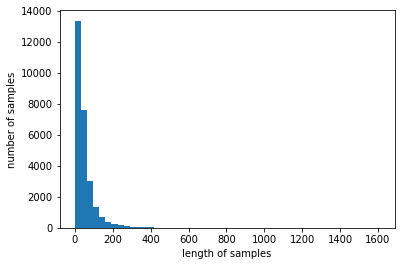

In [ ]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
print(tokenized_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#얘는 왜 안되는거?
full["토큰"] = ""
for i in range(len(full)):
    try:
        tokenized_sentence = okt.morphs(full['강의평'][i], stem=True) # 토큰화
        full['토큰'][i] = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    except:
        pass

<ipython-input-13-77646c1172a8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full['토큰'][i] = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거


In [ ]:
from nltk import FreqDist
import numpy as np

In [ ]:
# np.hstack으로 문장 구분을 제거
vocab = FreqDist(np.hstack(tokenized_data))

In [ ]:
print(vocab["교수"]) # 'barber'라는 단어의 빈도수 출력

21676


In [ ]:
vocab_size = 20000
vocab = vocab.most_common(vocab_size)

In [ ]:
word_to_index = {word[0] : index + 1 for index, word in enumerate(vocab)}

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()

# fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성.
tokenizer.fit_on_texts(tokenized_data)

In [ ]:
full['벡터']=""
for i in range(len(full)):
    try:
        full['벡터'][i] = tokenizer.texts_to_sequences(full['토큰'][i])
    except:
        pass

<ipython-input-21-f3e508be58da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full['벡터'][i] = tokenizer.texts_to_sequences(full['토큰'][i])


In [ ]:
import pickle
with open('tokenizer_final.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle)

In [ ]:
full['벡터'][0]

[[67], [21], [31], [2036], [37], [3900], [3072], [333], [1]]

In [ ]:
full['토큰'][0]

['어렵다', '않다', '내용', '탄탄하다', '기', '본기', '다지다', '유익하다', '수업']

In [ ]:
full['newvec'] = ''
for i in range(len(full)):
    full['newvec'][i] = sum(full['벡터'][i],[])

<ipython-input-25-1c56d59f7754>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full['newvec'][i] = sum(full['벡터'][i],[])


In [ ]:
full['newvec'][0]

[67, 21, 31, 2036, 37, 3900, 3072, 333, 1]

In [ ]:
full.to_csv('review_int.csv')

성적 분류 CNN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
dataset = pd.read_csv('review_int.csv')

In [ ]:
dataset.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', '학정번호', '강의명', '교수명', '유의사항', '별점',
       '수강시기', '강의평', '강의명/교수명', '성적', '로드', '강의력', '교수님성향', '강의자료질', '족보여부',
       '토큰', '벡터', 'newvec'],
      dtype='object')

In [ ]:
for i in range(len(dataset)):
    dataset['newvec'][i] = dataset['newvec'][i].strip("[""]")
    dataset['newvec'][i]=re.sub(",","",dataset['newvec'][i])
    dataset['newvec'][i]=dataset['newvec'][i].split()
    dataset['newvec'][i]=list(map(int,dataset['newvec'][i]))

<ipython-input-4-b878a9ff0e00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['newvec'][i] = dataset['newvec'][i].strip("[""]")
<ipython-input-4-b878a9ff0e00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['newvec'][i]=re.sub(",","",dataset['newvec'][i])
<ipython-input-4-b878a9ff0e00>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['newvec'][i]=dataset['newvec'][i].split()
<ipython-input-4-b878a9ff0e00>:5: 

In [ ]:
data_full = dataset[['newvec','성적']]
print(len(data_full))
data_full = data_full[data_full['성적']!= -1]
print(len(data_full))
data = data_full['newvec']
target = data_full['성적']

27142
18672


In [ ]:
target[target==0.5]=2

In [ ]:
target.head()

2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
Name: 성적, dtype: float64

In [ ]:
target = target.astype('int')

In [ ]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, shuffle=True, stratify=target, random_state=34)

In [ ]:
print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 14004
테스트용 리뷰 개수 : 4668
카테고리 : 3


In [ ]:
X_test

25289    [558, 1056, 486, 172, 389, 2, 15, 364, 169, 13...
16568    [567, 172, 8, 25, 907, 467, 38, 6, 64, 144, 87...
20203    [59, 4, 3, 16, 4, 3, 27, 446, 1, 35, 48, 17, 4...
13839    [460, 1486, 16374, 3876, 710, 319, 263, 87, 12...
4632     [40, 37, 22, 288, 7, 809, 150, 104, 178, 78, 2...
                               ...                        
25161    [641, 18917, 6644, 743, 1275, 338, 50, 19, 159...
3747     [129, 42, 123, 598, 125, 105, 400, 1023, 706, ...
8696     [4, 3, 6, 64, 180, 139, 558, 1098, 16, 2845, 5...
5447     [30, 15, 31, 67, 21, 43, 684, 11, 30, 15, 7, 3...
7926     [7, 410, 98, 4028, 17, 193, 502, 697, 14, 1819...
Name: newvec, Length: 4668, dtype: object

In [ ]:
y_train

15063    1
19127    1
23045    2
2872     1
14442    1
        ..
9848     2
16226    2
3263     1
23644    1
7685     1
Name: 성적, Length: 14004, dtype: int32

In [ ]:
max_len = 200
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
print('X_train의 크기(shape) :',X_train.shape)
print('X_test의 크기(shape) :',X_test.shape)

X_train의 크기(shape) : (14004, 200)
X_test의 크기(shape) : (4668, 200)


In [ ]:
print(y_train[:5])

15063    1
19127    1
23045    2
2872     1
14442    1
Name: 성적, dtype: int32


In [ ]:
vocab_size = 20000

In [ ]:
embedding_dim = 256 # 임베딩 벡터의 차원
dropout_ratio = 0.3 # 드롭아웃 비율
num_filters = 256 # 커널의 수
kernel_size = 3 # 커널의 크기
hidden_units = 128 # 뉴런의 수

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(3, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model_abc.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['acc'#,
                                                                                              #tf.keras.metrics.Precision(name='precision'),
                                                                                              # tf.keras.metrics.Recall(name='recall'),
                                                                                              # tf.keras.metrics.FalsePositives(name='false_positives'),
                                                                                              # tf.keras.metrics.FalseNegatives(name='false_negatives')
                                                                                              ])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[es, mc])

Epoch 1/20
438/438 [==============================] - 50s 113ms/step - loss: 0.7395 - acc: 0.6416 - val_loss: 0.6408 - val_acc: 0.7151

Epoch 00001: val_acc improved from -inf to 0.71508, saving model to best_model_abc.h5
Epoch 2/20
438/438 [==============================] - 51s 117ms/step - loss: 0.5570 - acc: 0.7691 - val_loss: 0.5942 - val_acc: 0.7393

Epoch 00002: val_acc improved from 0.71508 to 0.73929, saving model to best_model_abc.h5
Epoch 3/20
438/438 [==============================] - 53s 122ms/step - loss: 0.3678 - acc: 0.8548 - val_loss: 0.6150 - val_acc: 0.7506

Epoch 00003: val_acc improved from 0.73929 to 0.75064, saving model to best_model_abc.h5
Epoch 4/20
438/438 [==============================] - 50s 114ms/step - loss: 0.1826 - acc: 0.9350 - val_loss: 0.7856 - val_acc: 0.7506

Epoch 00004: val_acc did not improve from 0.75064
Epoch 5/20
438/438 [==============================] - 48s 110ms/step - loss: 0.1026 - acc: 0.9640 - val_loss: 0.9023 - val_acc: 0.7440

Epoch 

In [ ]:
del data_full, data, target, model

In [ ]:
data_full = dataset[['newvec','로드']]
print(len(data_full))
data_full = data_full[data_full['로드']!= -1]
print(len(data_full))
data = data_full['newvec']
target = data_full['로드']

27142
17935


In [ ]:
target[target==0.5]=2

In [ ]:
target.head()

1    2.0
2    2.0
3    2.0
4    2.0
5    2.0
Name: 로드, dtype: float64

In [ ]:
target = target.astype('int')

In [ ]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, shuffle=True, stratify=target, random_state=34)

In [ ]:
print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 13451
테스트용 리뷰 개수 : 4484
카테고리 : 3


In [ ]:
X_test

13375    [33, 11, 1, 233, 58, 2, 19, 888, 68, 580, 24, ...
9550     [58, 149, 213, 419, 136, 2401, 2060, 1256, 4, ...
8378     [447, 42, 190, 4, 3, 134, 6, 274, 1878, 3351, ...
19611    [1213, 14, 608, 3972, 127, 11, 1213, 17, 1, 8,...
17030    [37, 22, 2, 1989, 289, 67, 178, 6736, 559, 259...
                               ...                        
9432     [1, 163, 161, 60, 23, 66, 117, 333, 49, 133, 1...
228      [2107, 489, 12, 298, 5, 477, 196, 86, 2677, 15...
24435    [4, 3, 377, 419, 136, 6363, 902, 661, 234, 132...
17167    [504, 2673, 917, 86, 2898, 2176, 140, 1706, 91...
17591    [163, 999, 140, 439, 23, 77, 38, 58, 2, 198, 5...
Name: newvec, Length: 4484, dtype: object

In [ ]:
y_train

15514    0
4463     2
26321    2
23943    2
16865    1
        ..
4622     2
4811     2
1530     2
22700    2
16714    2
Name: 로드, Length: 13451, dtype: int32

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_len = 200
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
print('X_train의 크기(shape) :',X_train.shape)
print('X_test의 크기(shape) :',X_test.shape)

X_train의 크기(shape) : (13451, 200)
X_test의 크기(shape) : (4484, 200)


In [ ]:
print(y_train[:5])

15514    0
4463     2
26321    2
23943    2
16865    1
Name: 로드, dtype: int32


In [ ]:
vocab_size = 20000

In [ ]:
embedding_dim = 256 # 임베딩 벡터의 차원
dropout_ratio = 0.3 # 드롭아웃 비율
num_filters = 256 # 커널의 수
kernel_size = 3 # 커널의 크기
hidden_units = 128 # 뉴런의 수



model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(3, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model_load.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['acc'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[es, mc])

Epoch 1/20
421/421 [==============================] - 50s 117ms/step - loss: 0.9426 - acc: 0.5672 - val_loss: 0.8316 - val_acc: 0.6211

Epoch 00001: val_acc improved from -inf to 0.62110, saving model to best_model_load.h5
Epoch 2/20
421/421 [==============================] - 48s 113ms/step - loss: 0.7199 - acc: 0.6872 - val_loss: 0.7512 - val_acc: 0.6686

Epoch 00002: val_acc improved from 0.62110 to 0.66860, saving model to best_model_load.h5
Epoch 3/20
421/421 [==============================] - 51s 121ms/step - loss: 0.4643 - acc: 0.8168 - val_loss: 0.7761 - val_acc: 0.6902

Epoch 00003: val_acc improved from 0.66860 to 0.69023, saving model to best_model_load.h5
Epoch 4/20
421/421 [==============================] - 50s 120ms/step - loss: 0.2415 - acc: 0.9101 - val_loss: 0.9114 - val_acc: 0.6798

Epoch 00004: val_acc did not improve from 0.69023
Epoch 5/20
421/421 [==============================] - 52s 123ms/step - loss: 0.1222 - acc: 0.9599 - val_loss: 1.1315 - val_acc: 0.6849

Epo

In [ ]:
del data_full, data, target, model

In [ ]:
data_full = dataset[['newvec','강의력']]
print(len(data_full))
data_full = data_full[data_full['강의력']!= -1]
print(len(data_full))
data = data_full['newvec']
target = data_full['강의력']

27142
20606


In [ ]:
target[target==0.5]=2

In [ ]:
target.head()

0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: 강의력, dtype: float64

In [ ]:
target = target.astype('int')

In [ ]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, shuffle=True, stratify=target, random_state=34)

In [ ]:
print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 15454
테스트용 리뷰 개수 : 5152
카테고리 : 3


In [ ]:
X_train[5]

[207,
 338,
 264,
 249,
 22,
 9,
 1,
 1180,
 549,
 672,
 390,
 1,
 307,
 481,
 13,
 349,
 61,
 1873,
 24,
 550,
 25,
 12,
 278]

In [ ]:
X_test

5897     [2753, 2842, 968, 247, 96, 38, 4, 3, 6, 35, 28...
12033    [208, 10, 387, 7, 34, 381, 67, 582, 73, 281, 8...
6040     [1, 121, 33, 7, 1222, 7717, 3977, 813, 350, 70...
5517     [4, 3, 733, 717, 933, 28, 1, 25, 243, 72, 369,...
22425    [439, 4771, 52, 7, 206, 2806, 23, 31, 9, 4, 3,...
                               ...                        
14950    [154, 1813, 8135, 59, 4, 3, 464, 615, 95, 120,...
17711    [13, 140, 53, 86, 175, 80, 252, 52, 1551, 38, ...
26142    [372, 1, 20, 8, 319, 263, 90, 40, 37, 22, 11, ...
6482     [45, 25, 1637, 1909, 505, 96, 173, 351, 48, 55...
14650    [319, 7418, 464, 37, 22, 122, 606, 178, 438, 5...
Name: newvec, Length: 5152, dtype: object

In [ ]:
y_train

25219    1
4135     1
1381     2
25763    1
15674    1
        ..
18920    0
3684     2
23913    2
24226    2
16967    0
Name: 강의력, Length: 15454, dtype: int32

In [ ]:
max_len = 200
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
print('X_train의 크기(shape) :',X_train.shape)
print('X_test의 크기(shape) :',X_test.shape)

X_train의 크기(shape) : (15454, 200)
X_test의 크기(shape) : (5152, 200)


In [ ]:
print(y_train[:5])

25219    1
4135     1
1381     2
25763    1
15674    1
Name: 강의력, dtype: int32


In [ ]:
embedding_dim = 256 # 임베딩 벡터의 차원
dropout_ratio = 0.3 # 드롭아웃 비율
num_filters = 256 # 커널의 수
kernel_size = 3 # 커널의 크기
hidden_units = 128 # 뉴런의 수



model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(3, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model_power.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['acc'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[es, mc])

Epoch 1/20
483/483 [==============================] - 54s 111ms/step - loss: 0.9631 - acc: 0.5113 - val_loss: 0.8419 - val_acc: 0.6106

Epoch 00001: val_acc improved from -inf to 0.61064, saving model to best_model_power.h5
Epoch 2/20
483/483 [==============================] - 53s 109ms/step - loss: 0.7365 - acc: 0.6781 - val_loss: 0.8150 - val_acc: 0.6269

Epoch 00002: val_acc improved from 0.61064 to 0.62694, saving model to best_model_power.h5
Epoch 3/20
483/483 [==============================] - 52s 108ms/step - loss: 0.4918 - acc: 0.8032 - val_loss: 0.8174 - val_acc: 0.6667

Epoch 00003: val_acc improved from 0.62694 to 0.66673, saving model to best_model_power.h5
Epoch 4/20
483/483 [==============================] - 52s 108ms/step - loss: 0.2759 - acc: 0.8973 - val_loss: 0.9351 - val_acc: 0.6576

Epoch 00004: val_acc did not improve from 0.66673
Epoch 5/20
483/483 [==============================] - 53s 111ms/step - loss: 0.1517 - acc: 0.9444 - val_loss: 1.1483 - val_acc: 0.6574



In [ ]:
del data_full, data, target, model

In [ ]:
data_full = dataset[['newvec','교수님성향']]
print(len(data_full))
data_full = data_full[data_full['교수님성향']!= -1]
print(len(data_full))
data = data_full['newvec']
target = data_full['교수님성향']

27142
14234


In [ ]:
target[target==0.5]=2

In [ ]:
target.head()

1    1.0
2    1.0
3    1.0
4    1.0
7    1.0
Name: 교수님성향, dtype: float64

In [ ]:
target = target.astype('int')

In [ ]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, shuffle=True, stratify=target, random_state=34)

In [ ]:
print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 10675
테스트용 리뷰 개수 : 3559
카테고리 : 3


In [ ]:
X_test

16472    [4, 3, 180, 40, 37, 22, 188, 196, 1273, 721, 5...
21934    [58, 20, 32, 129, 873, 44, 1, 35, 1334, 99, 20...
20731    [4, 3, 2107, 9, 42, 39, 5694, 37, 4, 3, 6, 142...
21332    [1763, 969, 126, 2411, 1, 4, 3, 43, 55, 47, 24...
20361    [59, 8, 15, 233, 873, 256, 1190, 174, 182, 60,...
                               ...                        
10047    [389, 407, 1, 29, 320, 599, 7, 15, 5, 4, 3, 92...
12325    [4, 3, 1, 44, 229, 67, 10, 1359, 459, 17, 1358...
9210     [58, 366, 13, 49, 133, 917, 548, 63, 1, 17, 51...
10972    [29, 609, 35, 612, 1, 29, 519, 17, 134, 32, 13...
13302    [163, 6615, 6, 132, 828, 562, 98, 580, 3032, 7...
Name: newvec, Length: 3559, dtype: object

In [ ]:
y_train

19803    1
18469    1
18334    1
8830     1
9226     2
        ..
8855     2
24506    2
20094    1
13053    1
8678     2
Name: 교수님성향, Length: 10675, dtype: int32

In [ ]:
max_len = 200
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
print('X_train의 크기(shape) :',X_train.shape)
print('X_test의 크기(shape) :',X_test.shape)

X_train의 크기(shape) : (10675, 200)
X_test의 크기(shape) : (3559, 200)


In [ ]:
print(y_train[:5])

19803    1
18469    1
18334    1
8830     1
9226     2
Name: 교수님성향, dtype: int32


In [ ]:
vocab_size = 20000

In [ ]:
embedding_dim = 256 # 임베딩 벡터의 차원
dropout_ratio = 0.3 # 드롭아웃 비율
num_filters = 256 # 커널의 수
kernel_size = 3 # 커널의 크기
hidden_units = 128 # 뉴런의 수



model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(3, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model_kind.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['acc'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[es, mc])

Epoch 1/20
334/334 [==============================] - 38s 112ms/step - loss: 0.7137 - acc: 0.7133 - val_loss: 0.6424 - val_acc: 0.7266

Epoch 00001: val_acc improved from -inf to 0.72661, saving model to best_model_kind.h5
Epoch 2/20
334/334 [==============================] - 38s 115ms/step - loss: 0.5494 - acc: 0.7753 - val_loss: 0.6065 - val_acc: 0.7373

Epoch 00002: val_acc improved from 0.72661 to 0.73729, saving model to best_model_kind.h5
Epoch 3/20
334/334 [==============================] - 39s 116ms/step - loss: 0.3541 - acc: 0.8660 - val_loss: 0.5889 - val_acc: 0.7598

Epoch 00003: val_acc improved from 0.73729 to 0.75976, saving model to best_model_kind.h5
Epoch 4/20
334/334 [==============================] - 39s 115ms/step - loss: 0.1772 - acc: 0.9405 - val_loss: 0.6978 - val_acc: 0.7393

Epoch 00004: val_acc did not improve from 0.75976
Epoch 5/20
334/334 [==============================] - 37s 112ms/step - loss: 0.0702 - acc: 0.9774 - val_loss: 0.8646 - val_acc: 0.7696

Epo

In [ ]:
del data_full, data, target, model

In [ ]:
data_full = dataset[['newvec','강의자료질']]
print(len(data_full))
data_full = data_full[data_full['강의자료질']!= -1]
print(len(data_full))
data = data_full['newvec']
target = data_full['강의자료질']

27142
4877


In [ ]:
target[target==0.5]=2

In [ ]:
target.head()

24    2.0
31    2.0
34    2.0
48    2.0
68    2.0
Name: 강의자료질, dtype: float64

In [ ]:
target = target.astype('int')

In [ ]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, shuffle=True, stratify=target, random_state=34)

In [ ]:
print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 3657
테스트용 리뷰 개수 : 1220
카테고리 : 3


In [ ]:
X_test

13525    [4, 3, 1, 2072, 5709, 857, 181, 769, 4286, 89,...
4947     [1, 35, 513, 45, 158, 469, 24, 43, 88, 53, 23,...
12105    [4, 3, 2613, 1392, 26, 153, 9, 181, 2975, 1, 5...
21204    [35, 656, 59, 5667, 713, 362, 22, 269, 132, 47...
4908     [1, 282, 20, 35, 158, 27, 88, 14, 158, 257, 17...
                               ...                        
7606     [215, 457, 1, 1023, 2, 112, 261, 308, 315, 158...
9635     [1, 29, 208, 7, 2, 98, 222, 187, 368, 1, 75, 2...
5670     [129, 42, 338, 1049, 13, 5, 176, 20, 131, 37, ...
20847    [172, 249, 1187, 208, 57, 455, 389, 2, 172, 35...
1708     [1162, 103, 4891, 1, 4, 84, 2727, 158, 4386, 1...
Name: newvec, Length: 1220, dtype: object

In [ ]:
y_train

23298    2
16659    2
4882     0
2117     0
11668    2
        ..
24231    2
6882     2
6658     1
1879     2
19503    2
Name: 강의자료질, Length: 3657, dtype: int32

In [ ]:
max_len = 200
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
print('X_train의 크기(shape) :',X_train.shape)
print('X_test의 크기(shape) :',X_test.shape)

X_train의 크기(shape) : (3657, 200)
X_test의 크기(shape) : (1220, 200)


In [ ]:
print(y_train[:5])

23298    2
16659    2
4882     0
2117     0
11668    2
Name: 강의자료질, dtype: int32


In [ ]:
embedding_dim = 256 # 임베딩 벡터의 차원
dropout_ratio = 0.3 # 드롭아웃 비율
num_filters = 256 # 커널의 수
kernel_size = 3 # 커널의 크기
hidden_units = 128 # 뉴런의 수



model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(3, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model_qual.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['acc'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[es, mc])

Epoch 1/20
115/115 [==============================] - 13s 110ms/step - loss: 0.6477 - acc: 0.7974 - val_loss: 0.6170 - val_acc: 0.8008

Epoch 00001: val_acc improved from -inf to 0.80082, saving model to best_model_qual.h5
Epoch 2/20
115/115 [==============================] - 12s 107ms/step - loss: 0.5743 - acc: 0.8007 - val_loss: 0.5710 - val_acc: 0.8008

Epoch 00002: val_acc did not improve from 0.80082
Epoch 3/20
115/115 [==============================] - 12s 108ms/step - loss: 0.4265 - acc: 0.8313 - val_loss: 0.5516 - val_acc: 0.8197

Epoch 00003: val_acc improved from 0.80082 to 0.81967, saving model to best_model_qual.h5
Epoch 4/20
115/115 [==============================] - 13s 109ms/step - loss: 0.2029 - acc: 0.9355 - val_loss: 0.5986 - val_acc: 0.8197

Epoch 00004: val_acc did not improve from 0.81967
Epoch 5/20
115/115 [==============================] - 13s 113ms/step - loss: 0.0536 - acc: 0.9882 - val_loss: 0.7305 - val_acc: 0.8254

Epoch 00005: val_acc improved from 0.81967 

In [ ]:
del data_full, data, target, model

In [ ]:
data_full = dataset[['newvec','족보여부']]
print(len(data_full))
data_full = data_full[data_full['족보여부']!= -1]
print(len(data_full))
data = data_full['newvec']
target = data_full['족보여부']

27142
1522


In [ ]:
target[target==0.5]=2

In [ ]:
target.head()

101    0.0
151    0.0
593    2.0
605    1.0
619    1.0
Name: 족보여부, dtype: float64

In [ ]:
target = target.astype('int')

In [ ]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, shuffle=True, stratify=target, random_state=34)

In [ ]:
print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 1141
테스트용 리뷰 개수 : 381
카테고리 : 3


In [ ]:
X_test

828      [108, 438, 161, 1, 153, 128, 1121, 21, 283, 15...
5378     [89, 410, 126, 386, 52, 1, 29, 307, 1146, 223,...
101      [207, 13, 390, 1, 5, 252, 62, 48, 65, 362, 239...
17878    [184, 816, 56, 13, 30, 15, 37, 22, 7, 100, 206...
18873    [525, 310, 4834, 509, 3822, 184, 2012, 706, 11...
                               ...                        
16284    [1200, 143, 25, 17, 28, 8, 174, 667, 26, 32, 3...
19190    [6, 373, 2244, 84, 293, 2830, 7, 63, 10, 16, 3...
7515     [582, 42, 17, 36, 165, 8, 105, 127, 411, 20, 9...
25645    [187, 1264, 1247, 384, 8, 326, 129, 779, 6, 26...
17806    [696, 148, 202, 140, 21, 1, 150, 15, 13, 62, 7...
Name: newvec, Length: 381, dtype: object

In [ ]:
y_train

1845     1
9438     1
3936     2
19503    0
18798    0
        ..
1488     2
16183    2
16598    1
3812     2
1072     2
Name: 족보여부, Length: 1141, dtype: int32

In [ ]:
max_len = 200
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
print('X_train의 크기(shape) :',X_train.shape)
print('X_test의 크기(shape) :',X_test.shape)

X_train의 크기(shape) : (1141, 200)
X_test의 크기(shape) : (381, 200)


In [ ]:
print(y_train[:5])

1845     1
9438     1
3936     2
19503    0
18798    0
Name: 족보여부, dtype: int32


In [ ]:
embedding_dim = 256 # 임베딩 벡터의 차원
dropout_ratio = 0.3 # 드롭아웃 비율
num_filters = 256 # 커널의 수
kernel_size = 3 # 커널의 크기
hidden_units = 128 # 뉴런의 수



model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(dropout_ratio))
model.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(3, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model_jokbo.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['acc'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[es, mc])

Epoch 1/20
36/36 [==============================] - 5s 118ms/step - loss: 1.0534 - acc: 0.4321 - val_loss: 1.0325 - val_acc: 0.5171

Epoch 00001: val_acc improved from -inf to 0.51706, saving model to best_model_jokbo.h5
Epoch 2/20
36/36 [==============================] - 4s 118ms/step - loss: 0.9935 - acc: 0.4987 - val_loss: 0.9741 - val_acc: 0.5696

Epoch 00002: val_acc improved from 0.51706 to 0.56955, saving model to best_model_jokbo.h5
Epoch 3/20
36/36 [==============================] - 4s 112ms/step - loss: 0.8388 - acc: 0.6643 - val_loss: 0.8848 - val_acc: 0.5984

Epoch 00003: val_acc improved from 0.56955 to 0.59843, saving model to best_model_jokbo.h5
Epoch 4/20
36/36 [==============================] - 4s 120ms/step - loss: 0.6093 - acc: 0.7905 - val_loss: 0.8111 - val_acc: 0.6430

Epoch 00004: val_acc improved from 0.59843 to 0.64304, saving model to best_model_jokbo.h5
Epoch 5/20
36/36 [==============================] - 4s 116ms/step - loss: 0.3066 - acc: 0.9062 - val_loss: 

In [ ]:
del data_full, data, target, model, tokenizer

In [ ]:
import pickle

In [ ]:
with open('tokenizer_final.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
max_len = 200
loaded_model1 = load_model('best_model_abc.h5')
loaded_model2 = load_model('best_model_load.h5')
loaded_model3 = load_model('best_model_power.h5')
loaded_model4 = load_model('best_model_kind.h5')
loaded_model5 = load_model('best_model_qual.h5')
loaded_model6 = load_model('best_model_jokbo.h5')

In [ ]:
from konlpy.tag import Okt

In [ ]:
okt = Okt()

In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

다른 척도들 탐색 : Recall, Precision, f1 score (acc 제외)

족보 여부

In [ ]:
y_pred = loaded_model6.predict(X_test)

In [ ]:
y_pred

array([[5.7104934e-04, 9.9585044e-01, 3.5785097e-03],
       [1.6061357e-01, 7.6176888e-01, 7.7617601e-02],
       [1.0258526e-01, 4.1910559e-01, 4.7830909e-01],
       ...,
       [5.8962475e-03, 5.2259088e-01, 4.7151294e-01],
       [2.8926255e-05, 6.8901840e-04, 9.9928206e-01],
       [4.6199279e-06, 3.5418587e-05, 9.9995995e-01]], dtype=float32)

In [ ]:
predicted = y_pred.argmax(axis=-1)



In [ ]:
predicted

array([1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 0, 1, 2, 2, 1, 2, 1,
       1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0,
       2, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       2, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 1, 1, 0, 2, 2, 2, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1,
       2, 0, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1,
       1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 0, 1, 1, 2, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1,

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_test, predicted, average='macro'))
print(f1_score(y_test, predicted, average='macro'))

0.6911119001124325
0.6911119001124325


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_test, predicted, average = 'macro'))
from sklearn.metrics import recall_score
print(recall_score(y_test, predicted, average = 'macro'))

0.7338307520317544
0.6757430309824942


성적

In [ ]:
data_full = dataset[['newvec','성적']]
print(len(data_full))
data_full = data_full[data_full['성적']!= -1]
print(len(data_full))
data = data_full['newvec']
target = data_full['성적']
target[target==0.5]=2
target = target.astype('int')


27142
18672


In [ ]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, shuffle=True, stratify=target, random_state=34)
max_len = 200
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
y_pred = loaded_model1.predict(X_test)
predicted = y_pred.argmax(axis=-1)

In [ ]:
print('성적')
print(f1_score(y_test, predicted, average='macro'))
print(precision_score(y_test, predicted, average = 'macro'))
print(recall_score(y_test, predicted, average = 'macro'))

성적
0.6434682382183735
0.7087768262323154
0.6109675483491889


In [ ]:
data_full = dataset[['newvec','로드']]
print(len(data_full))
data_full = data_full[data_full['로드']!= -1]
print(len(data_full))
data = data_full['newvec']
target = data_full['로드']
target[target==0.5]=2
target = target.astype('int')

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, shuffle=True, stratify=target, random_state=34)
max_len = 200
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

y_pred = loaded_model2.predict(X_test)
predicted = y_pred.argmax(axis=-1)

27142
17935


로드

In [ ]:
print('로드')
print(f1_score(y_test, predicted, average='macro'))
print(precision_score(y_test, predicted, average = 'macro'))
print(recall_score(y_test, predicted, average = 'macro'))

로드
0.6287904239641868
0.6748889174815577
0.6089630667743344


강의력

In [ ]:
data_full = dataset[['newvec','강의력']]
print(len(data_full))
data_full = data_full[data_full['강의력']!= -1]
print(len(data_full))
data = data_full['newvec']
target = data_full['강의력']
target[target==0.5]=2
target = target.astype('int')

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, shuffle=True, stratify=target, random_state=34)
max_len = 200
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

y_pred = loaded_model3.predict(X_test)
predicted = y_pred.argmax(axis=-1)

27142
20606


In [ ]:
print('강의력')
print(f1_score(y_test, predicted, average='macro'))
print(precision_score(y_test, predicted, average = 'macro'))
print(recall_score(y_test, predicted, average = 'macro'))

강의력
0.6324558154750201
0.6550215357756519
0.6230397808416437


교수님 성향

In [ ]:
data_full = dataset[['newvec','교수님성향']]
print(len(data_full))
data_full = data_full[data_full['교수님성향']!= -1]
print(len(data_full))
data = data_full['newvec']
target = data_full['교수님성향']
target[target==0.5]=2
target = target.astype('int')

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, shuffle=True, stratify=target, random_state=34)
max_len = 200
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

y_pred = loaded_model4.predict(X_test)
predicted = y_pred.argmax(axis=-1)

27142
14234


In [ ]:
print('교수님성향')
print(f1_score(y_test, predicted, average='macro'))
print(precision_score(y_test, predicted, average = 'macro'))
print(recall_score(y_test, predicted, average = 'macro'))

교수님성향
0.586846253044271
0.6260689042483629
0.5634481185642288


강의자료 질

In [ ]:
data_full = dataset[['newvec','강의자료질']]
print(len(data_full))
data_full = data_full[data_full['강의자료질']!= -1]
print(len(data_full))
data = data_full['newvec']
target = data_full['강의자료질']
target[target==0.5]=2
target = target.astype('int')

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, shuffle=True, stratify=target, random_state=34)
max_len = 200
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

y_pred = loaded_model5.predict(X_test)
predicted = y_pred.argmax(axis=-1)

27142
4877


In [ ]:
print('강의자료질')
print(f1_score(y_test, predicted, average='macro'))
print(precision_score(y_test, predicted, average = 'macro'))
print(recall_score(y_test, predicted, average = 'macro'))

강의자료질
0.6134032795997776
0.709533727690074
0.5655030504925925


In [ ]:
def sentiment_predict(s):
    s = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", s)
    s = re.sub('^ +', "", s)
        
    s = okt.morphs(s, stem=True) # 토큰화
    s = [word for word in s if not word in stopwords] # 불용어 제거
        
    encoded = tokenizer.texts_to_sequences([s]) # 정수 인코딩
    padded = pad_sequences(encoded, maxlen=max_len) # 패딩
    score1 = loaded_model1.predict(padded)
    score1 = list(score1.flatten())
    label1 = score1.index(max(score1))
    
    score2 = loaded_model2.predict(padded)
    score2 = list(score2.flatten())
    label2 = score2.index(max(score2))
    
    score3 = loaded_model3.predict(padded)
    score3 = list(score3.flatten())
    label3 = score3.index(max(score3))
    
    score4 = loaded_model4.predict(padded)
    score4 = list(score4.flatten())
    label4 = score4.index(max(score4))
    
    score5 = loaded_model5.predict(padded)
    score5 = list(score5.flatten())
    label5 = score5.index(max(score5))
    
    score6 = loaded_model6.predict(padded)
    score6 = list(score6.flatten())
    label6 = score6.index(max(score6))
    
    if (label1 == 1):
        print("성적을 잘 주는 강의입니다.\n")
    elif (label1 == 0):
        print("성적을 잘 주지 않는 강의입니다.\n")
    elif (label1 == 2):
        print("성적을 잘 주지도 안 주지도 않는 강의입니다.\n")
    else:pass
    
        
    if (label2 == 1):
        print("로드가 적은 강의입니다.\n")
    elif (label2 == 0):
        print("로드가 많은 강의입니다.\n")
    elif (label2 == 2):
        print("로드가 많지도 적지도 않은 강의입니다.\n")
    else: pass
    
    if (label3 == 1):
        print("강의력이 좋은 강의입니다.\n")
    elif (label3 == 0):
        print("강의력이 좋지 않은 강의입니다.\n")
    elif (label3 == 2):
        print("강의력이 좋지도, 안 좋지도 않은 강의입니다.\n")
    else: pass
    
    if (label4 == 1):
        print("교수님의 성향이 좋은 편인 강의입니다.\n")
    elif (label4 == 0):
        print("교수님의 성향이 좋지 않은 편인 강의입니다.\n")
    elif (label4 == 2):
        print("교수님의 성향이 보통인 강의입니다.\n")
    else: pass
    
    if (label5 == 1):
        print("강의 자료 질이 좋은 강의입니다.\n")
    elif (label5 == 0):
        print("강의 자료 질이 좋지 않은 강의입니다.\n")
    elif (label5 == 2):
        print("강의 자료 질이 보통인 강의입니다.\n")
    else: pass
    
    if (label6 == 1):
        print("족보를 타는 과목입니다.\n")
    elif (label6 == 0):
        print("족보를 타지 않는 과목입니다.\n")
    elif (label6 == 2):
        print("족보에 대한 언급은 있으나 애매한 과목입니다.\n")
    else: pass
    
while (True):
    text = input("강의평을 입력하세요 (취소 : q 입력)\n")
    if text == 'q':
        print('강의평 입력을 중지합니다.')
        break
    sentiment_predict(text)